<a href="https://colab.research.google.com/github/MANOJ9590/SPA/blob/main/SmartProcessAnalytics(Task2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 2 - Predictive Analysis based on the event log

---
Group 12

*   Venkatesh Hariharapura Shivashankar - 220200713
*   Vibha lyer - 220200717
*   Manojkumar Krishnakumar - 220200906
*   Priya Yadav - 220200937
*   Ramesh Reddy Modulla - 221100615

In [ ]:
!pip install pm4py

In [2]:
import pm4py
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def import_xes(filepath):
  return pm4py.read_xes(filepath)

In [5]:
def events_to_cases(eventlog):
  case={}
  complete_events = []
  for concept in range(0,len(eventlog)) :
    events = []
    for name in range(0 ,len(eventlog[concept])):
      events.append(eventlog[concept][name]['concept:name'])
      complete_events.append(eventlog[concept][name]['concept:name'])
      case[concept] = events
  return case,complete_events

In [22]:
def place_value(number):
    return ("{:,}".format(number))

In [6]:
def runing_instance_sublist_check(Ngram_sequence,trace):
    for i in range(len(trace) - len(Ngram_sequence) + 1):
      if ((Ngram_sequence) == (trace[i:i+len(Ngram_sequence)])): return True
    return False

In [8]:
def computing_probabilites(events_log, n_th_gram, running_instance):
  if (n_th_gram <= len(running_instance)):
    predections=[]
    incremental_predection_probability={}
    for i in range(n_th_gram):
      if(n_th_gram >=1):
        Ngram_seq = running_instance[-n_th_gram : ]
        n_th_element = Ngram_seq[len(Ngram_seq)-1]
        for j in range(len(events_log)):
          if(runing_instance_sublist_check(Ngram_seq,events_log[j])==True):
            next_event=(events_log[j].index(n_th_element)+1)
            if(len(events_log[j]) == next_event):
              continue
            predection = events_log[j][next_event]
            predections.append(predection)
        max_occurance = max(predections, key = predections.count)
        occurance = dict((element,predections.count(element)) for element in set(predections))
        probabilities = {}
        for k, v in occurance.items():
          probabilities[k] = round(v /sum(occurance.values()),4)
      incremental_predection_probability[str(n_th_gram) + "- Gram"] = probabilities
      n_th_gram -= 1
    return pd.DataFrame(incremental_predection_probability).fillna(0)
  else : 
    return "Range of Ngram value should be less or equal to number of events in running instance input provided"

In [ ]:
cases,Total_events=events_to_cases(import_xes('/content/drive/MyDrive/BPIChallenge2018.xes'))

In [10]:
import yaml
#insert any number between 0 to 14423 to get the sequece to design the running sequence in the next step 
print(yaml.dump(cases[0]))

[mail income, mail valid, initialize, begin editing, initialize, begin editing, finish
    editing, create, clear, create, clear, create, clear, create, clear, create, finish
    pre-check, save, finish pre-check, save, finish pre-check, finish editing, initialize,
  performed, initialize, calculate, finish editing, begin editing, calculate, finish
    editing, begin editing, calculate, finish editing, begin editing, calculate, finish
    editing, begin editing, calculate, finish editing, begin editing, calculate, finish
    editing, begin editing, calculate, begin editing, calculate, finish editing, calculate,
  finish editing, begin editing, calculate, finish editing, decide, begin payment,
  insert document, insert document, finish payment]



In [19]:
#refer the previous cell output to designing the running instance input 
running_process_instance = ['finish editing', 'create', 'initialize', 'performed']
# enter the number less than or equal to nuber of events in runnning instance input provided
Ngram_input = 4
result=computing_probabilites(cases,Ngram_input,running_process_instance)

In [33]:
if(type(result) == pd.core.frame.DataFrame):
  print("Dataset contains",str(place_value(len(cases))),"cases with",str(place_value(len(Total_events))),"events \n")
  print('\033[1m'+"Predective Analysis \n")
  print(result.to_markdown(tablefmt="grid"))
else :
  print(result)

Dataset contains 14,424 cases with 847,383 events 

Predective Analysis 

+------------------------+-----------+-----------+-----------+-----------+
|                        |   4- Gram |   3- Gram |   2- Gram |   1- Gram |
+========================+===========+===========+===========+===========+
| calculate              |    0.0003 |    0.0008 |    0.0027 |    0.0033 |
+------------------------+-----------+-----------+-----------+-----------+
| insert document        |    0.0012 |    0.0016 |    0.0035 |    0.004  |
+------------------------+-----------+-----------+-----------+-----------+
| change department      |    0.0002 |    0.0002 |    0.0001 |    0.0001 |
+------------------------+-----------+-----------+-----------+-----------+
| begin editing          |    0.0477 |    0.048  |    0.0638 |    0.0684 |
+------------------------+-----------+-----------+-----------+-----------+
| finish editing         |    0.0009 |    0.0015 |    0.0048 |    0.0058 |
+------------------------+

In [ ]:
df = pm4py.convert_to_dataframe(import_xes('/content/drive/MyDrive/BPIChallenge2018-1.xes'))

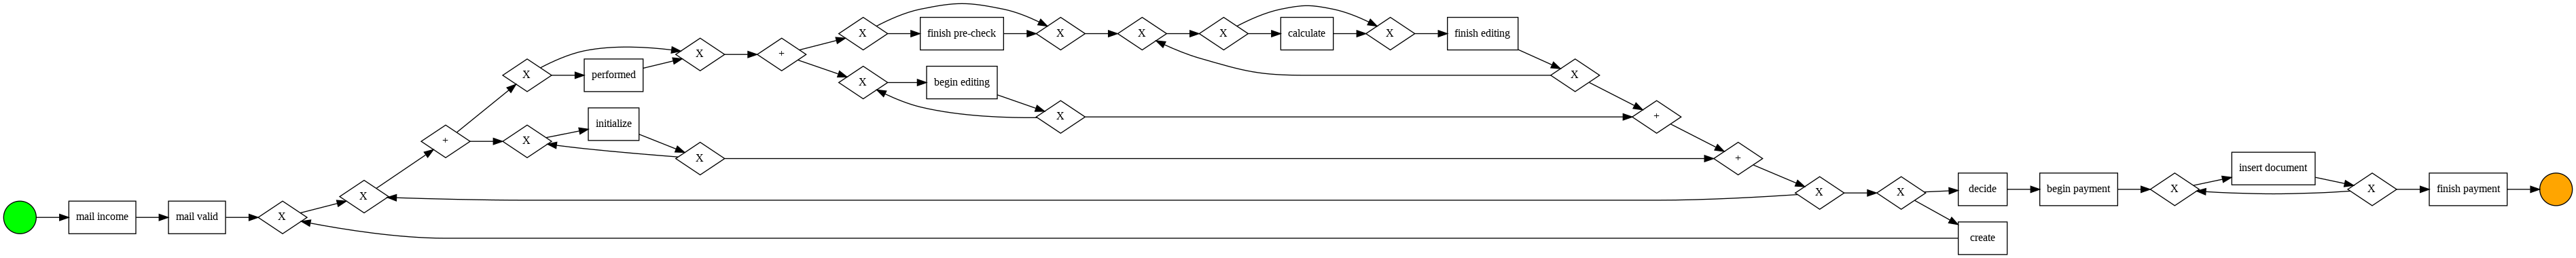

In [25]:
bpmn_model = pm4py.discover_bpmn_inductive(df)
pm4py.view_bpmn(bpmn_model)

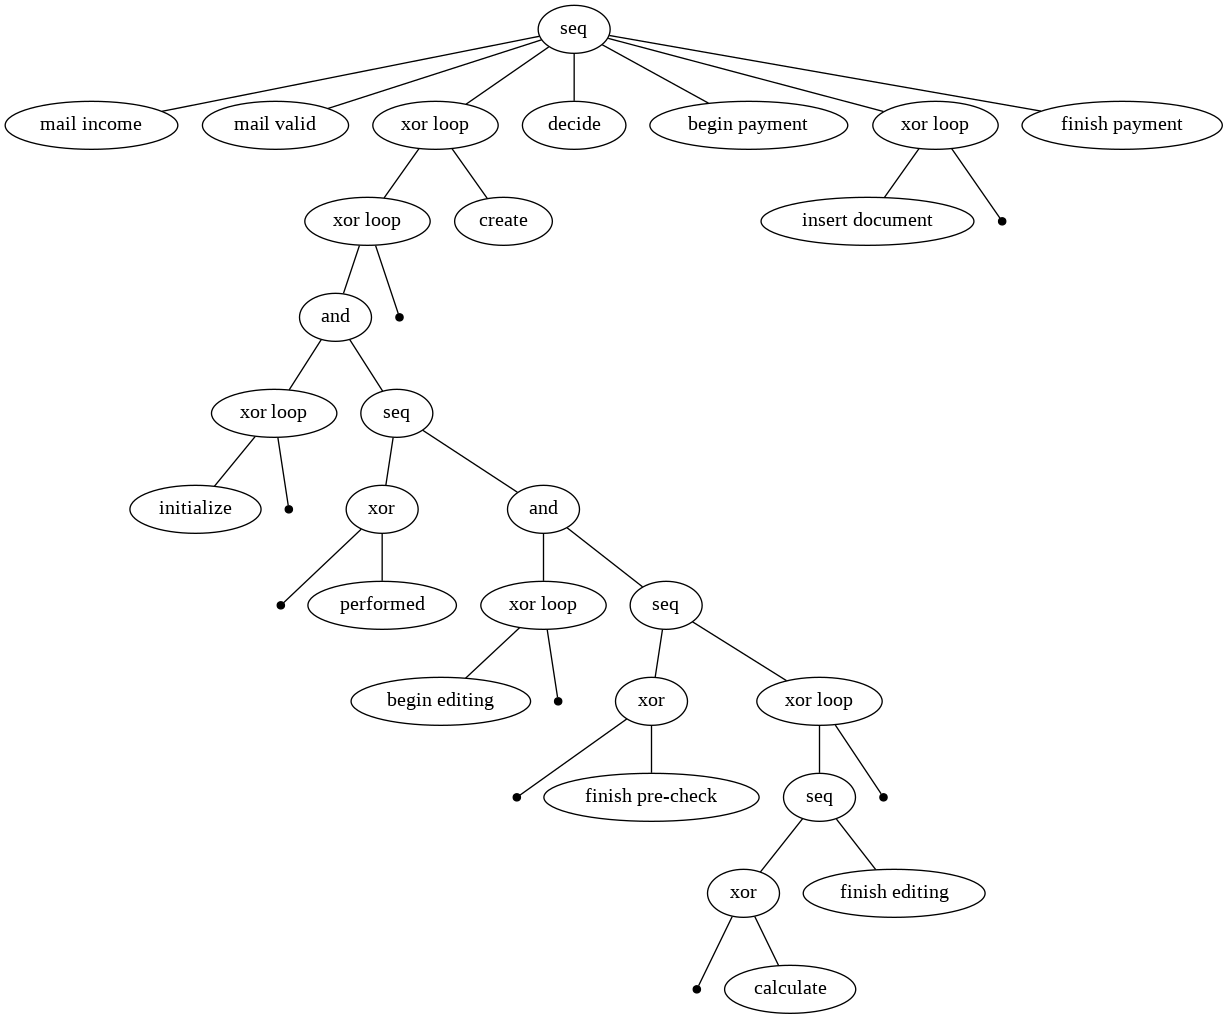

In [26]:
process_tree = pm4py.discover_process_tree_inductive(df)
pm4py.view_process_tree(process_tree)

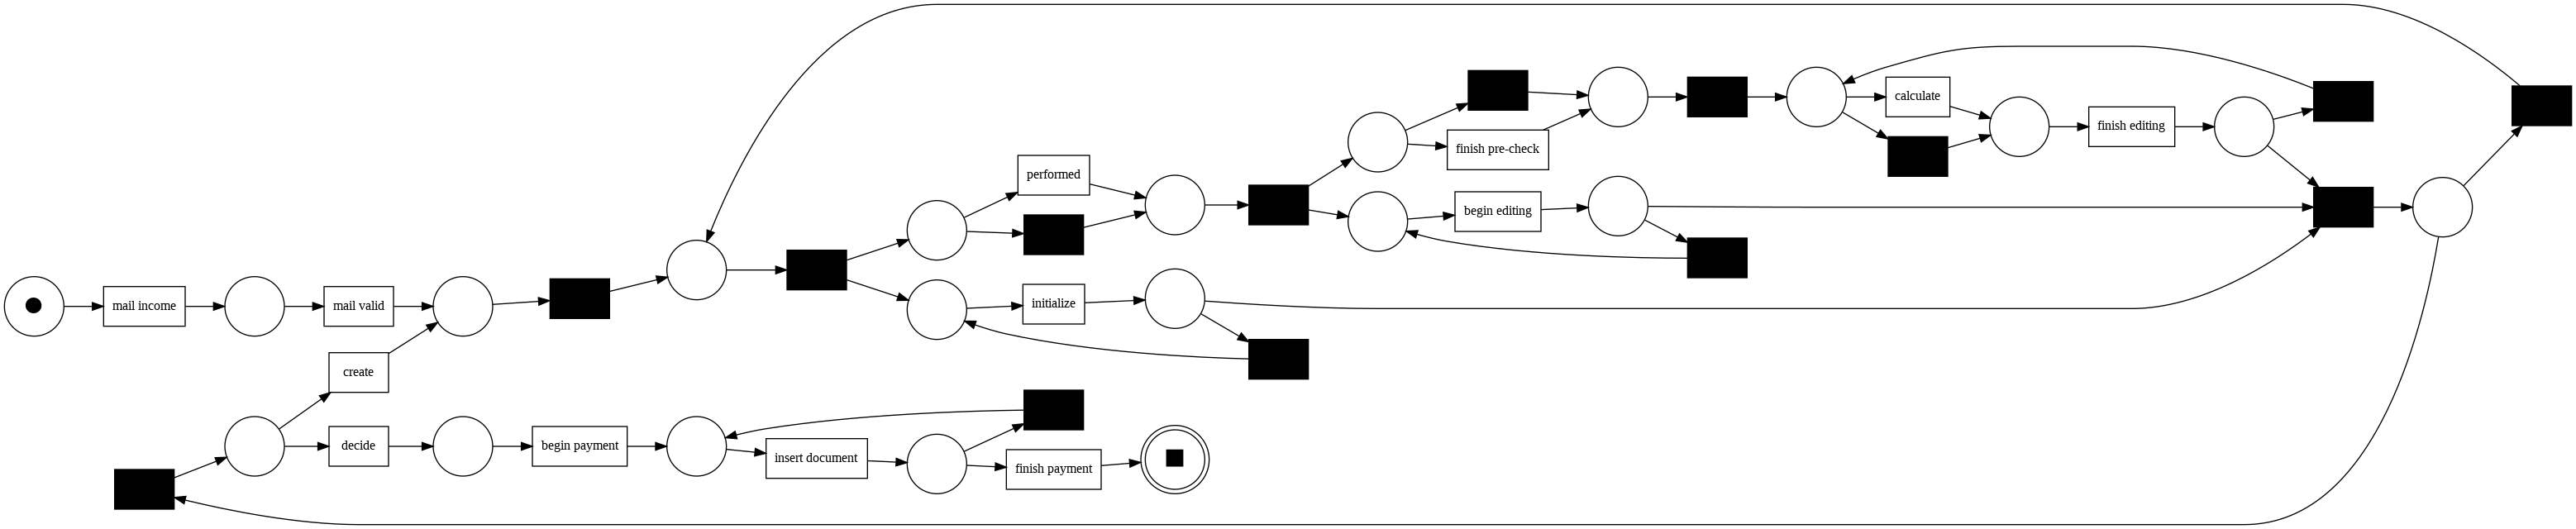

In [27]:
net1, im1, fm1 = pm4py.convert_to_petri_net(process_tree)
pm4py.view_petri_net(net1,im1,fm1)

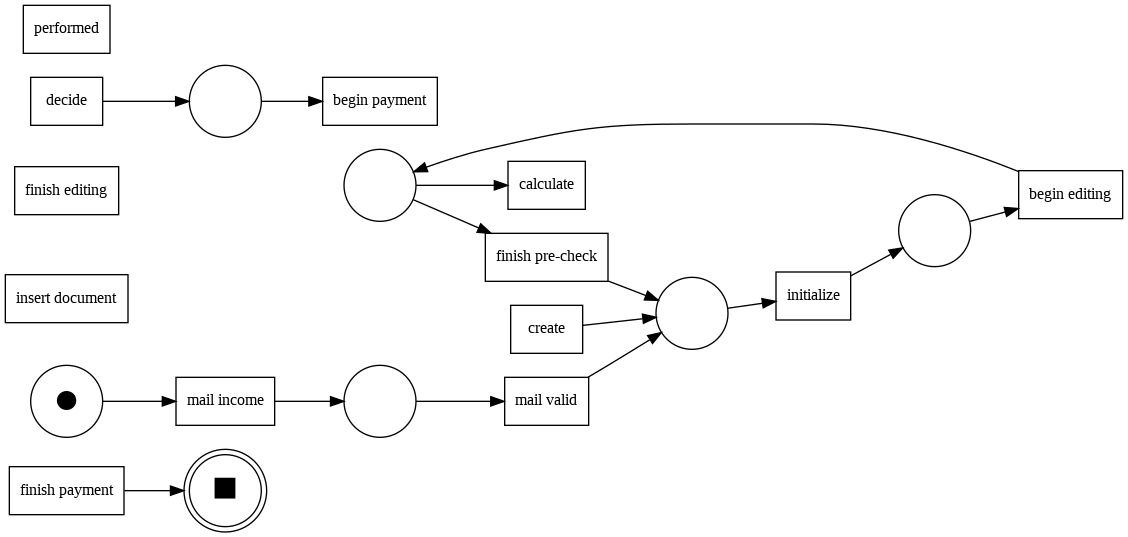

In [28]:
net3, im3, fm3 = pm4py.discover_petri_net_alpha(df)
pm4py.view_petri_net(net3, im3, fm3)

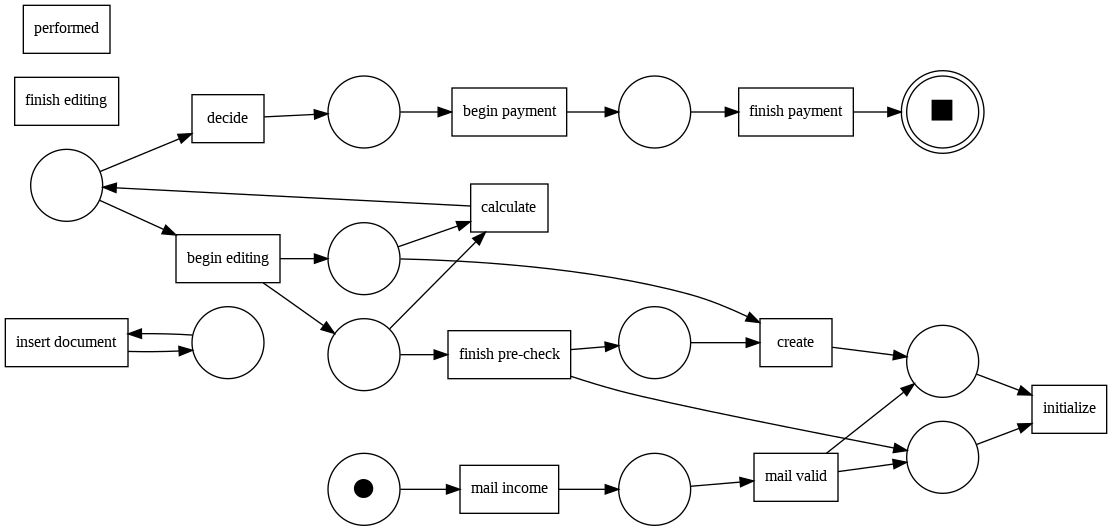

In [29]:
net4, im4, fm4 = pm4py.discover_petri_net_alpha_plus(df)
pm4py.view_petri_net(net4, im4, fm4)

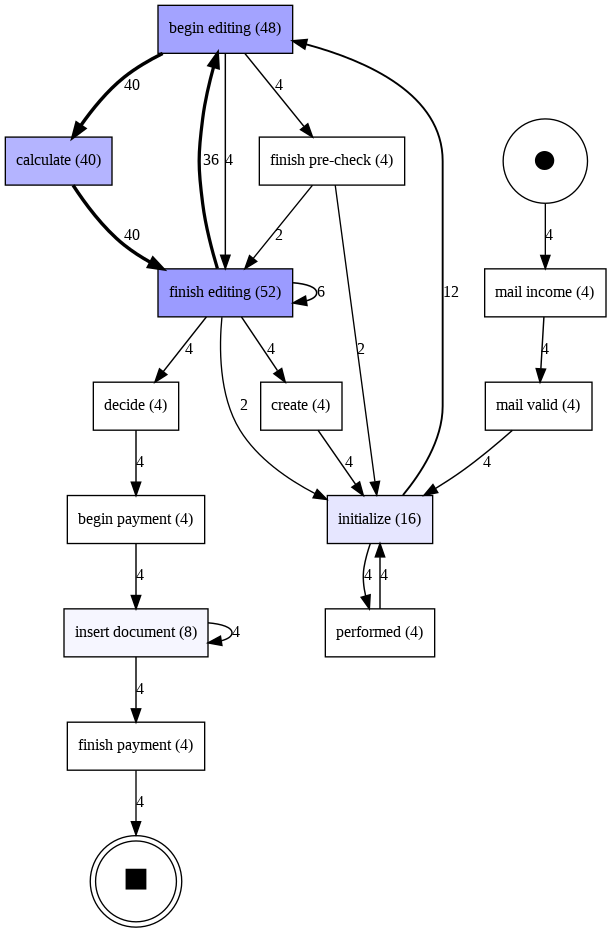

In [30]:
dfg, start_activities, end_activities = pm4py.discover_dfg(df)
pm4py.view_dfg(dfg, start_activities, end_activities)

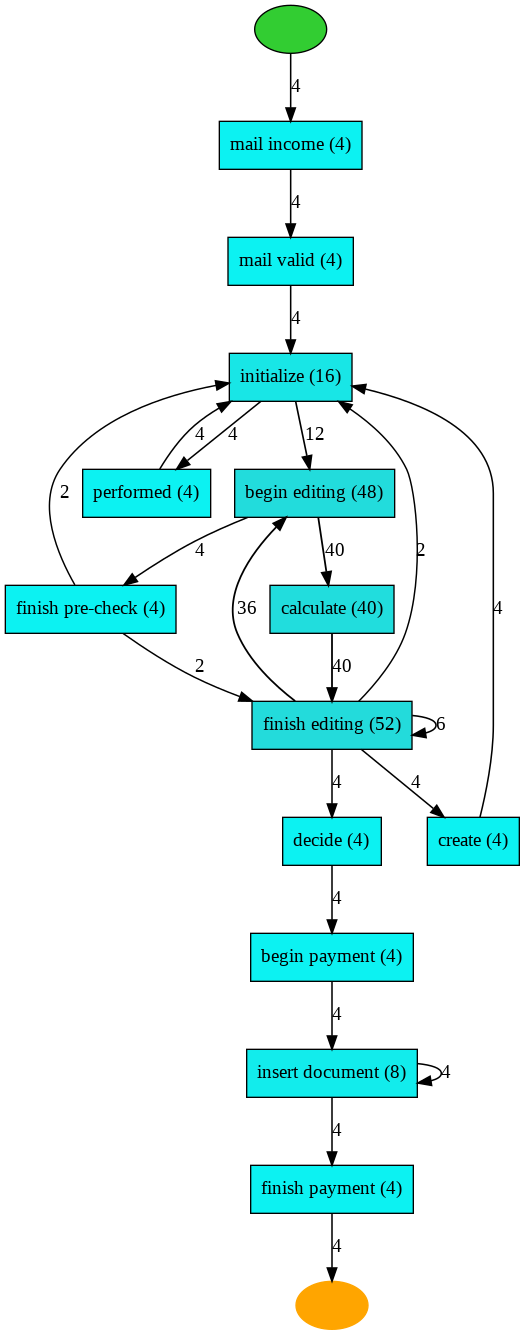

In [31]:
map = pm4py.discover_heuristics_net(df)
pm4py.view_heuristics_net(map)
